# Train on Actual Tasks

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [2]:
torch.manual_seed(1)

In [3]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


## Datasets

### MNIST

In [4]:
# The training data
mnist_training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# The testing data
mnist_test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

## Training Function

In [5]:
def train(args, model, device, train_loader, loss_func, optimizer, epoch):
    model.train()
    training_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_func(output, target)
        training_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        if batch_idx % args["log_interval"] == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch,
                    batch_idx * len(data),
                    len(train_loader.dataset),
                    100.0 * batch_idx / len(train_loader),
                    loss.item(),
                )
            )
    return training_loss[-1]

## Testing Function

In [6]:
def test(model, device, loss_func, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_func(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print(
        "\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss,
            correct,
            len(test_loader.dataset),
            100.0 * correct / len(test_loader.dataset),
        )
    )

    return correct / len(test_loader.dataset)

## Plot Functions

In [7]:
def plot_losses(epochs, loss_per_model):
    for index, loss in enumerate(loss_per_model):
        plt.plot(np.arange(1, epochs + 1), loss, label="Model" + str(index + 1))
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
    plt.title("All Model Loss")
    plt.legend()
    plt.show()

In [8]:
def plot_accuracy(epochs, accuracy_per_model):
    for index, accuracy in enumerate(accuracy_per_model):
        plt.plot(np.arange(1, epochs + 1), accuracy, label="CNN Model" + str(index + 1))
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")

    plt.title("All Model Accuracy")
    plt.legend()
    plt.show()

## Loss and Accuracy

In [9]:
loss_per_model = []
accuracy_per_model = []

## CNN Model 1

In [10]:
class Cnn1(nn.Module):
    def __init__(self):
        super(Cnn1, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 5, 1, 2)
        self.conv2 = nn.Conv2d(16, 32, 5, 1, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        return x

In [11]:
batch_size = 64

mnist_train_dataloader = DataLoader(mnist_training_data, batch_size=batch_size)
mnist_test_dataloader = DataLoader(mnist_test_data, batch_size=batch_size)

In [12]:
args = {"log_interval": 10, "lr": 1e-3, "epochs": 10}

In [13]:
model = Cnn1().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=args["lr"])

In [14]:
training_loss = []
testing_accuracy = []
for epoch in range(1, args["epochs"] + 1):
    loss = train(
        args, model, device, mnist_train_dataloader, loss_func, optimizer, epoch
    )
    training_loss.append(loss)
    accuracy = test(model, device, loss_func, mnist_test_dataloader)
    testing_accuracy.append(accuracy)

loss_per_model.append(training_loss)
accuracy_per_model.append(testing_accuracy)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.311632
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.966885
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.286083
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.672349
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.544206
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.352463
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.303031
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.289368
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.601545
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.310284
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.281426
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.260436
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.264456
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.153543
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.240007
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.376373
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.473571
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.197874
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.432330
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.218859
Train Epoch: 1 [12800/60000 (

## CNN Model 2

In [15]:
class Cnn2(nn.Module):
    def __init__(self):
        super(Cnn2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(64 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [16]:
batch_size = 64

mnist_train_dataloader = DataLoader(mnist_training_data, batch_size=batch_size)
mnist_test_dataloader = DataLoader(mnist_test_data, batch_size=batch_size)

In [17]:
args = {"log_interval": 10, "lr": 1e-3, "epochs": 10}

In [18]:
model = Cnn2().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=args["lr"])

In [19]:
training_loss = []
testing_accuracy = []
for epoch in range(1, args["epochs"] + 1):
    loss = train(
        args, model, device, mnist_train_dataloader, loss_func, optimizer, epoch
    )
    training_loss.append(loss)
    accuracy = test(model, device, loss_func, mnist_test_dataloader)
    testing_accuracy.append(accuracy)

loss_per_model.append(training_loss)
accuracy_per_model.append(testing_accuracy)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307110
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.903683
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.410949
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.033609
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.605110
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.463667
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.329820
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.330469
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.572708
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.180671
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.200020
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.280309
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.266915
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.176308
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.206131
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.192113
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.415809
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.165992
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.451626
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.221480
Train Epoch: 1 [12800/60000 (

## CNN Model 3

In [20]:
class Cnn3(nn.Module):
    def __init__(self):
        super(Cnn3, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [21]:
batch_size = 64

mnist_train_dataloader = DataLoader(mnist_training_data, batch_size=batch_size)
mnist_test_dataloader = DataLoader(mnist_test_data, batch_size=batch_size)

In [22]:
args = {"log_interval": 10, "lr": 1e-3, "epochs": 10}

In [23]:
model = Cnn3().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=args["lr"])

In [24]:
training_loss = []
testing_accuracy = []
for epoch in range(1, args["epochs"] + 1):
    loss = train(
        args, model, device, mnist_train_dataloader, loss_func, optimizer, epoch
    )
    training_loss.append(loss)
    accuracy = test(model, device, loss_func, mnist_test_dataloader)
    testing_accuracy.append(accuracy)

loss_per_model.append(training_loss)
accuracy_per_model.append(testing_accuracy)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.304827
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.512861
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.111366
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.683244
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.576126
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.549197
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.437336
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.446389
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.868694
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.346314
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.352442
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.299522
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.341168
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.224740
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.201338
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.405457
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.503274
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.221631
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.501125
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.168635
Train Epoch: 1 [12800/60000 (

## Result

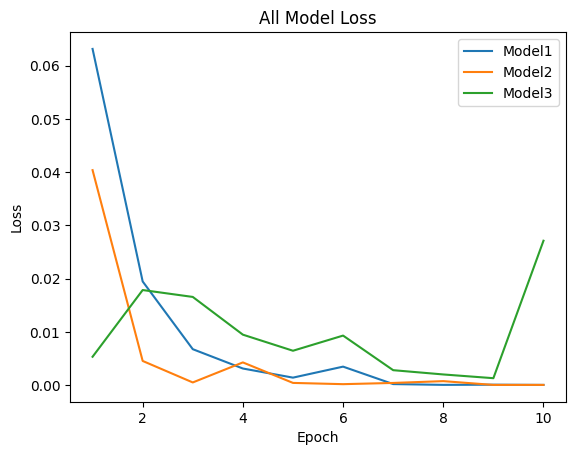

In [25]:
plot_losses(10, loss_per_model)

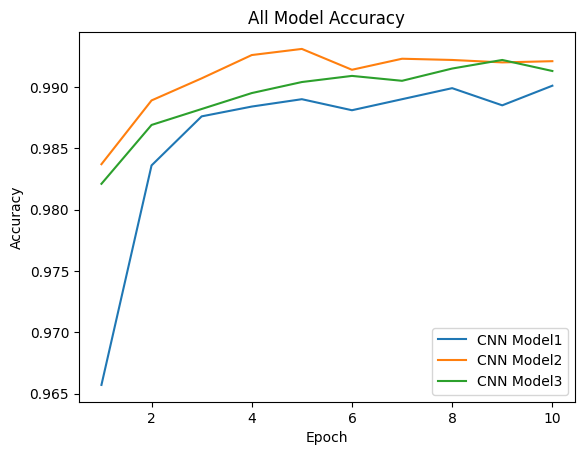

In [26]:
plot_accuracy(10, accuracy_per_model)